# IRIS FLOWER CLASSIFICATION

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report



In [31]:
df=pd.read_csv('./IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.shape

(150, 5)

In [5]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df_num=df.select_dtypes(include=np.number)
df_num

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
df_num.skew()

sepal_length    0.314911
sepal_width     0.334053
petal_length   -0.274464
petal_width    -0.104997
dtype: float64

In [8]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Preprocessing 

In [9]:

label_encoder = LabelEncoder()
df_species_encoded= label_encoder.fit_transform(df['species'])
df_species_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

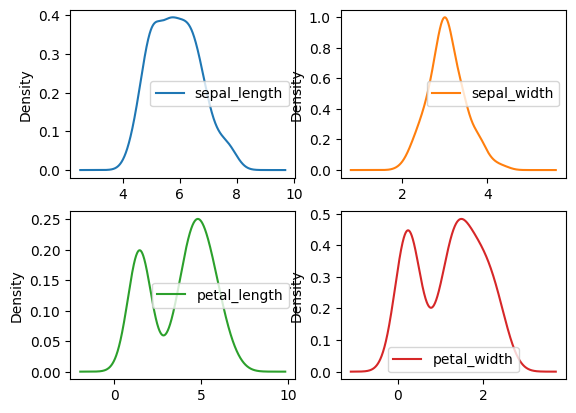

In [10]:
import matplotlib.pyplot as plt

df.plot(kind='density', subplots=True, sharex=False, layout=(2,2))
plt.show()

In [11]:
from sklearn.preprocessing import PowerTransformer
power_transform=PowerTransformer()
pt=power_transform.fit_transform(df[['sepal_length','sepal_width', 'petal_length', 'petal_width']])
pt


array([[-0.89568956,  1.03519074, -1.33331222, -1.32913026],
       [-1.18517298, -0.0736376 , -1.33331222, -1.32913026],
       [-1.48792061,  0.38549737, -1.38700221, -1.32913026],
       [-1.64460909,  0.15869735, -1.27941381, -1.32913026],
       [-1.03883758,  1.24227114, -1.33331222, -1.32913026],
       [-0.48420122,  1.8378223 , -1.17102145, -1.04639815],
       [-1.64460909,  0.82351094, -1.33331222, -1.18691602],
       [-1.03883758,  0.82351094, -1.27941381, -1.32913026],
       [-1.9693691 , -0.31178612, -1.33331222, -1.32913026],
       [-1.18517298,  0.15869735, -1.27941381, -1.4732057 ],
       [-0.48420122,  1.44494886, -1.27941381, -1.32913026],
       [-1.3348226 ,  0.82351094, -1.22531454, -1.32913026],
       [-1.3348226 , -0.0736376 , -1.33331222, -1.4732057 ],
       [-2.13777024, -0.0736376 , -1.49372334, -1.4732057 ],
       [ 0.02642955,  2.02835353, -1.44047555, -1.32913026],
       [-0.09743879,  2.7545796 , -1.27941381, -1.04639815],
       [-0.48420122,  1.

In [12]:
df_pt=pd.DataFrame(data=pt,columns=df_num.columns)
df_pt.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.895690,1.035191,-1.333312,-1.32913
1,-1.185173,-0.073638,-1.333312,-1.32913
2,-1.487921,0.385497,-1.387002,-1.32913
3,-1.644609,0.158697,-1.279414,-1.32913
4,-1.038838,1.242271,-1.333312,-1.32913


In [13]:
df_pt.skew()

sepal_length    0.009869
sepal_width     0.000039
petal_length   -0.246172
petal_width    -0.157775
dtype: float64

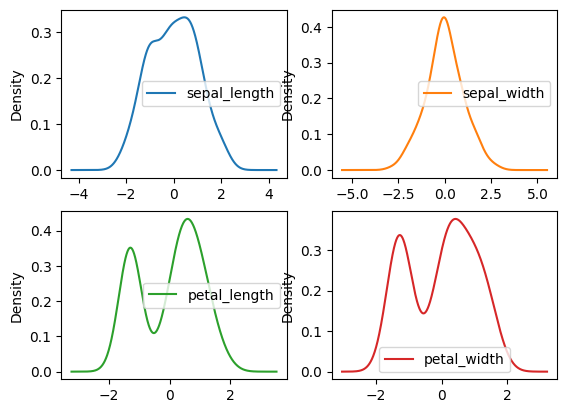

In [14]:

df_pt.plot(kind='density', subplots=True, sharex=False, layout=(2,2))
plt.show()

# SPLITTING THE DATA

In [15]:
X=df_pt


y=df_species_encoded


In [16]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=5)
print('X TRAIN',X_train.shape)
print('X TEST',X_test.shape)
print('y TRAIN',y_train.shape)
print('y Test',y_test.shape)

X TRAIN (105, 4)
X TEST (45, 4)
y TRAIN (105,)
y Test (45,)


In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# MODEL BUILDING and TRAINING

In [18]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

# EVALUATE THE MODEL

In [19]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))


Accuracy: 0.96
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      0.94      0.94        16
           2       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [21]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


# BUILD and TRAIN NEUTRAL NETWORK

In [22]:
model = Sequential([
    Dense(10, activation='relu', input_shape=(4,)),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
4/4 [==============================] - 1s 7ms/step - loss: 1.2696 - accuracy: 0.3429
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 1.2467 - accuracy: 0.3714
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 1.2244 - accuracy: 0.4000
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 1.2029 - accuracy: 0.4286
Epoch 5/100
4/4 [==============================] - 0s 7ms/step - loss: 1.1842 - accuracy: 0.4857
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 1.1645 - accuracy: 0.4667
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 1.1466 - accuracy: 0.4476
Epoch 8/100
4/4 [==============================] - 0s 8ms/step - loss: 1.1300 - accuracy: 0.4571
Epoch 9/100
4/4 [==============================] - 0s 7ms/step - loss: 1.1138 - accuracy: 0.4667
Epoch 10/100
4/4 [==============================] - 0s 6ms/step - loss: 1.0976 - accuracy: 0.4857
Epoch 11/100
4/4 [===========

# Evaluate the model 

In [23]:

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.93


In [33]:
df2=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df2.head()

,Actual,Predicted
0,1,1
1,2,2
2,2,2
3,0,0
4,2,2
